In [6]:
from __future__ import print_function,division
from scipy import stats as st
import numpy as np
import pandas as pd
import numpy.random as rd

import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import seaborn as sns

sns.set(style="whitegrid", palette="muted", color_codes=True) 


In [7]:
# 3つのドアのうち、1つだけ当たりの車がある
car = np.array([1, 0, 0])

rate:  0.324333333333


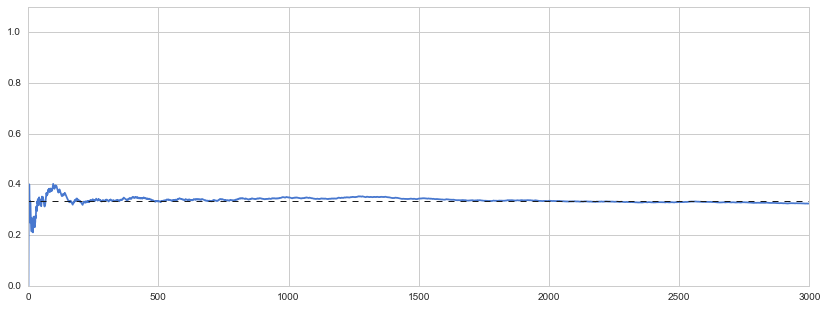

In [8]:
# 答えを変えない場合（モンティが扉を開けても意思を変えないのでそもそも開かない）

n = 3000
result_list = []

for i in range(n):
    # 車の位置のシャッフル
    rd.shuffle(car)
    
    # 回答者はランダムに３つの扉から１つ選ぶ
    ans = rd.randint(0,3)
    
    if car[ans] == 1:
        # 回答者の答えが車の位置だったらあたり
        result_list.append(1)
    else:
        # それ以外ははずれ
        result_list.append(0)
        
print("rate: ", sum(result_list)/n)
plt.figure(figsize=(14,5))
plt.ylim(0,1.1)

plt.plot([np.sum(result_list[:i])/i for i in range(1,n)])
plt.plot([0, n],[1/3, 1/3],"k--", lw=1)
plt.title('Average ratio of correct answers')
plt.show()

rate:  0.670666666667


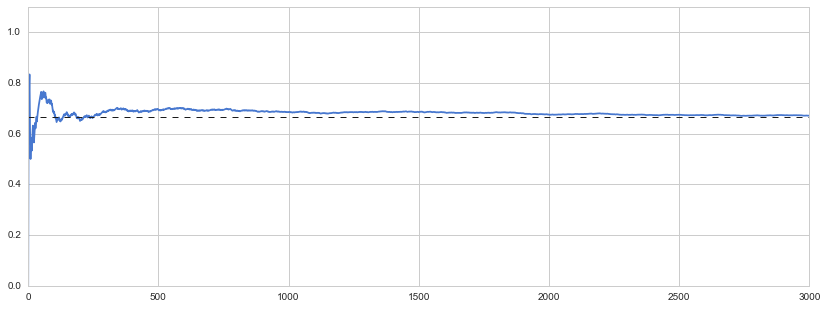

In [9]:
# モンティがドアを開けた後、回答者は必ず答えを変更する
n = 3000
result_list = []

for i in range(n):
    # 車の位置のシャッフル
    rd.shuffle(car)
    
    # 回答者はランダムに３つの扉から１つ選ぶ
    ans = rd.randint(0,3)
    
    # 最初の回答が当たっていた場合
    if car[ans] == 1:
        # モンティは残りの2つから扉をランダムに１つ開ける
        
        # target:正解が入っていない扉のINDEXリスト
        if ans == 0:
            target = [1, 2]
        elif ans == 1:
            target = [0, 2]
        else:
            target = [0, 1]
            
        monty_select = rd.randint(0,2)             # モンティの選んだ扉
        change_ans = 0 if monty_select == 1 else 1 # 回答者はモンティの選んだものの反対側を選ぶ
        second_ans = target[change_ans]            # 回答の変更
        if car[second_ans] == 1:
            # 変更後の回答が正解だったばあい
            result_list.append(1)
        else:
            # 外れだったばあい
            result_list.append(0)
            
    else:
        # 最初の回答が外れていた場合、
        # モンティは回答者が選んでおらず、かつ正解ではない扉を開ける
        # そのご、回答者は回答を変更する。
        # それは必ず正解となる
        result_list.append(1)
 
        
# 答え合わせ 
print("rate: ", sum(result_list)/n)
plt.figure(figsize=(14,5))
plt.ylim(0,1.1)

plt.plot([np.sum(result_list[:i])/i for i in range(1,n)])
plt.plot([0, n],[2/3, 2/3],"k--", lw=1)
plt.title('Average ratio of correct answers')
plt.show()